In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# identifying data type
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [5]:
# creating validation data and scaling
X_valid, X_train = X_train[:4000], X_train[4000:] / 255
y_valid, y_train = y_train[:4000], y_train[4000:]
X_test = X_test / 255

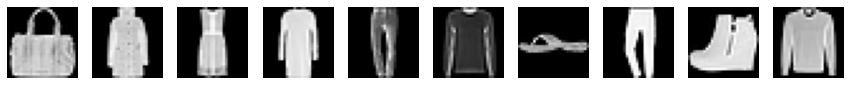

In [6]:
# Printing first ten images
plt.figure(figsize = (15, 5))
plotnumber = 1

for i in range(10):
    if plotnumber <= 10:
        ax = plt.subplot(1, 10, plotnumber) #1 row,3column
        plt.imshow(X_train[i], cmap = plt.cm.gray) #show images
        plt.axis('off') # turn off the axes
    plotnumber += 1

plt.show()

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]], class_names[y_train[1]] 

('Bag', 'Coat')

In [9]:
# initializing the model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation = 'relu'), # Adding the input layer and the first hidden layer
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax') # Adding the output layer
])

In [10]:
# summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 70)                7070      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3550      
_________________________________________________________________
dense_3 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 90,350
Trainable params: 90,350
Non-trainable params: 0
____________________________________________________

In [11]:
# compiling model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), # as value is integer
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy']) # Adam converges faster

In [19]:
# fitting model
model_history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 20) # returns a History callback

Epoch 1/20
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2451 - accuracy: 0.9088 - val_loss: 63.3291 - val_accuracy: 0.8457
Epoch 2/20
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2368 - accuracy: 0.9100 - val_loss: 52.4504 - val_accuracy: 0.8512
Epoch 3/20
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2300 - accuracy: 0.9127 - val_loss: 61.2795 - val_accuracy: 0.8608
Epoch 4/20
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2277 - accuracy: 0.9137 - val_loss: 51.7694 - val_accuracy: 0.8580
Epoch 5/20
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2191 - accuracy: 0.9165 - val_loss: 51.7374 - val_accuracy: 0.8620
Epoch 6/20
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2151 - accuracy: 0.9184 - val_loss: 64.6995 - val_accuracy: 0.8512
Epoch 7/20
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2100 - accuracy: 0.9200 - val_loss: 62.8726 - val_ac

In [13]:
# evaluating model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8768


[0.350589394569397, 0.876800000667572]

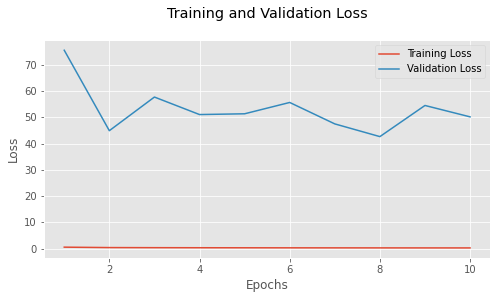

In [14]:
plt.figure(figsize = (8, 4))
plt.style.use('ggplot') #style

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 11)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

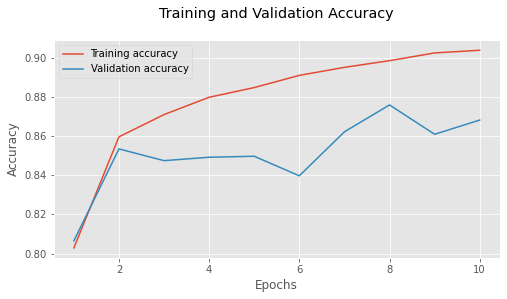

In [15]:
plt.figure(figsize = (8, 4))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 11)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best') # automatically finds a location based on where it avoids covering any data points
plt.show()

In [16]:
# making predictions
y_probs = model.predict(X_test) # predit the values 
y_preds = y_probs.argmax(axis = 1)

y_preds[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 5,
       7, 5, 1, 2, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 6, 7,
       6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       3, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 2, 5, 3, 6, 7, 1, 8, 0, 1, 2, 2], dtype=int64)

In [17]:
X_new = X_test[:8]

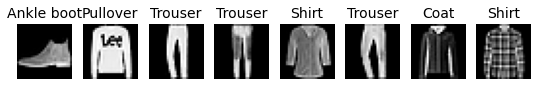

In [18]:
y_new = y_test[:8]
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 8, index+1)
    plt.imshow(image, cmap=plt.cm.binary_r)
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=14)
plt.show()